In [46]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as Data
from NN import Net
%matplotlib inline

In [47]:
LR = 0.01
N = 1000
batch_size = 32
Epoch = 12

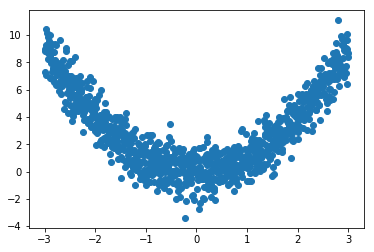

In [48]:
x = torch.unsqueeze(torch.linspace(-3,3,N), dim = 1)
y = x**2 + torch.randn(N,1)
plt.scatter(x.numpy(), y.numpy())

In [54]:
datasets = Data.TensorDataset(data_tensor=x, target_tensor=y)
loader = Data.DataLoader(
    dataset=datasets,
    batch_size=batch_size,
    shuffle = True,
    num_workers=2)

In [55]:
net_SGD         = Net(1,10,1)
net_Momentum    = Net(1,10,1)
net_RMSprop     = Net(1,10,1)
net_Adam        = Net(1,10,1)
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

In [56]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [57]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]

In [58]:
for epoch in xrange(Epoch):
    print('Epoch: ', epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)
        
        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)
            loss = loss_func(output, b_y)
            opt.zero_grad()
            loss.backward()
            opt.step()
            l_his.append(loss.data[0])

('Epoch: ', 0)
('Epoch: ', 1)
('Epoch: ', 2)
('Epoch: ', 3)
('Epoch: ', 4)
('Epoch: ', 5)
('Epoch: ', 6)
('Epoch: ', 7)
('Epoch: ', 8)
('Epoch: ', 9)
('Epoch: ', 10)
('Epoch: ', 11)


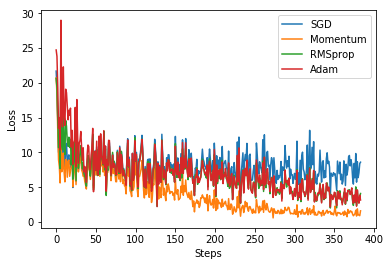

In [59]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')

In [60]:
torch.save(net_Adam, 'net_Adam.pkl')